In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('twitter_training.csv')

In [4]:
df.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
68832,3787,Cyberpunk2077,Positive,"When I update my GPU and Mobo, my PC will look..."
7455,9281,Overwatch,Negative,After finally grabbing Sigmas skin the moods j...
47517,5752,HomeDepot,Positive,J Congratulations to all stores and associates...
40984,1433,Battlefield,Irrelevant,I remember back when people in City One would ...
33508,6553,Fortnite,Neutral,@FortniteGame because they changed the map sin...


In [5]:
column_names = ['S.No.', 'Context', 'target', 'text']

# Read the CSV file and assign the column names
df = pd.read_csv('twitter_training.csv', names=column_names)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   S.No.    74682 non-null  int64 
 1   Context  74682 non-null  object
 2   target   74682 non-null  object
 3   text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# prompt: remove the null values rows

df.dropna(inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   S.No.    73996 non-null  int64 
 1   Context  73996 non-null  object
 2   target   73996 non-null  object
 3   text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [9]:
df.drop(columns=['S.No.', 'Context'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  73996 non-null  object
 1   text    73996 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [11]:
df.shape

(73996, 2)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

4227

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(69769, 2)

In [19]:
df.head()

,target,text
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [20]:
df['target'].value_counts()

target
1    21237
3    19138
2    17110
0    12284
Name: count, dtype: int64

In [21]:
df.sample(10)

,target,text
4409,2,Already cheating in @BlackOpsColdWar Well come...
72246,2,Tom Clancy's Ghost Recon: Choke Point ift.tt/3...
14761,1,Servers crash in-game now... WTF Valve?
3028,3,Also like I ’ m LOVING
11846,1,After a few games @ N2K
46200,2,Guess where @Quibi @WeWork @instagram @Verizon...
43482,1,@PUBGMOBILE_IN character ID:- 5932218327 hacke...
41315,2,The @EA_DICE so happy this back in to life!
43280,3,"more than 452K requests via tweet, but no resp..."
69866,3,"While I ""can't wait"" for the game, I'll also w..."


In [22]:
import matplotlib.pyplot as plt

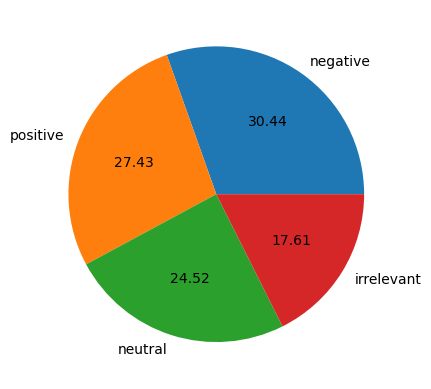

In [23]:
plt.pie(df['target'].value_counts(), labels=['negative', 'positive', 'neutral', 'irrelevant'], autopct="%0.2f")
plt.show()

In [24]:
#Data is imbalanced
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,3,im getting on borderlands and i will murder yo...,53
1,3,I am coming to the borders and I will kill you...,51
2,3,im getting on borderlands and i will kill you ...,50
3,3,im coming on borderlands and i will murder you...,51
4,3,im getting on borderlands 2 and i will murder ...,57


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,3,im getting on borderlands and i will murder yo...,53,11
1,3,I am coming to the borders and I will kill you...,51,13
2,3,im getting on borderlands and i will kill you ...,50,11
3,3,im coming on borderlands and i will murder you...,51,11
4,3,im getting on borderlands 2 and i will murder ...,57,13


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,3,im getting on borderlands and i will murder yo...,53,11,1
1,3,I am coming to the borders and I will kill you...,51,13,1
2,3,im getting on borderlands and i will kill you ...,50,11,1
3,3,im coming on borderlands and i will murder you...,51,11,1
4,3,im getting on borderlands 2 and i will murder ...,57,13,1


In [32]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,69769.000000,69769.000000,69769.000000
mean,112.535954,23.370107,1.982385
std,78.482287,16.989718,1.650521
min,1.000000,0.000000,0.000000
25%,51.000000,11.000000,1.000000
50%,95.000000,19.000000,1.000000
75%,156.000000,32.000000,2.000000
max,957.000000,198.000000,33.000000


In [33]:
# irrelevant
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,12284.00000,12284.000000,12284.000000
mean,113.33564,23.598665,2.051775
std,78.01365,16.906940,1.734589
min,1.00000,0.000000,0.000000
25%,53.00000,11.000000,1.000000
50%,94.00000,19.000000,1.000000
75%,157.00000,33.000000,2.000000
max,692.00000,198.000000,25.000000


In [34]:
# negative
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,21237.000000,21237.000000,21237.000000
mean,115.132834,24.089419,1.851486
std,81.014481,17.258610,1.379552
min,1.000000,0.000000,0.000000
25%,50.000000,10.000000,1.000000
50%,95.000000,20.000000,1.000000
75%,165.000000,34.000000,2.000000
max,727.000000,198.000000,22.000000


In [35]:
# neutral
df[df['target'] == 2][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,17110.000000,17110.000000,17110.000000
mean,122.222151,24.701870,2.142665
std,75.799688,16.790482,1.902202
min,1.000000,0.000000,0.000000
25%,66.000000,13.000000,1.000000
50%,108.000000,20.000000,1.000000
75%,164.000000,33.000000,3.000000
max,957.000000,198.000000,31.000000


In [36]:
# positive
df[df['target'] == 3][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,19138.000000,19138.000000,19138.000000
mean,100.481189,21.234560,1.939806
std,76.760965,16.719458,1.614564
min,1.000000,0.000000,0.000000
25%,41.000000,9.000000,1.000000
50%,80.000000,17.000000,1.000000
75%,139.000000,29.000000,2.000000
max,692.000000,198.000000,33.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

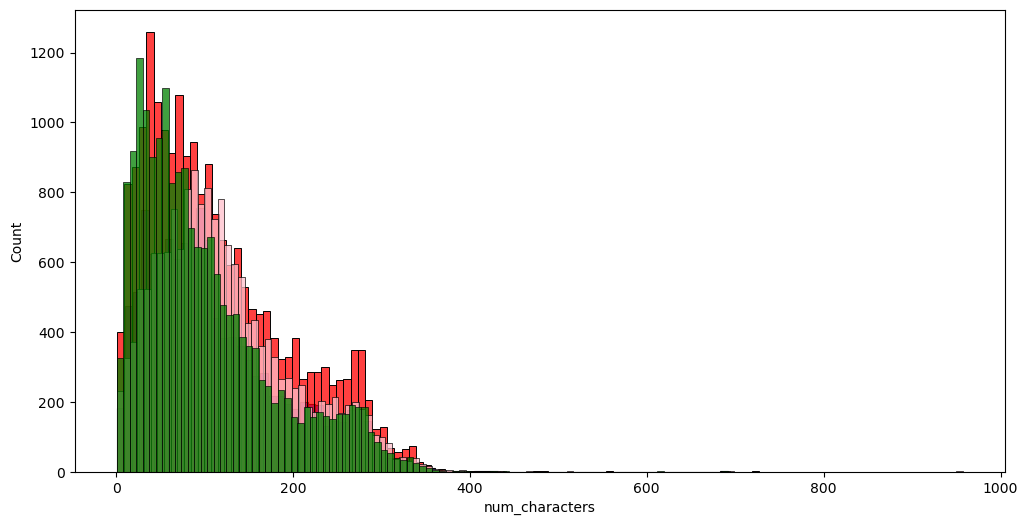

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
sns.histplot(df[df['target'] == 2]['num_characters'], color='pink')
sns.histplot(df[df['target'] == 3]['num_characters'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

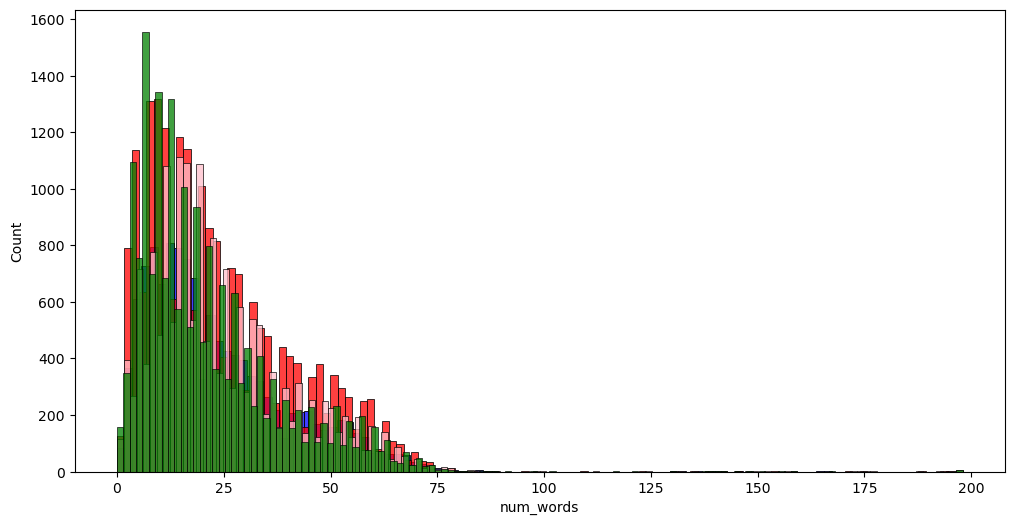

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
sns.histplot(df[df['target'] == 2]['num_words'], color='pink')
sns.histplot(df[df['target'] == 3]['num_words'], color='green')

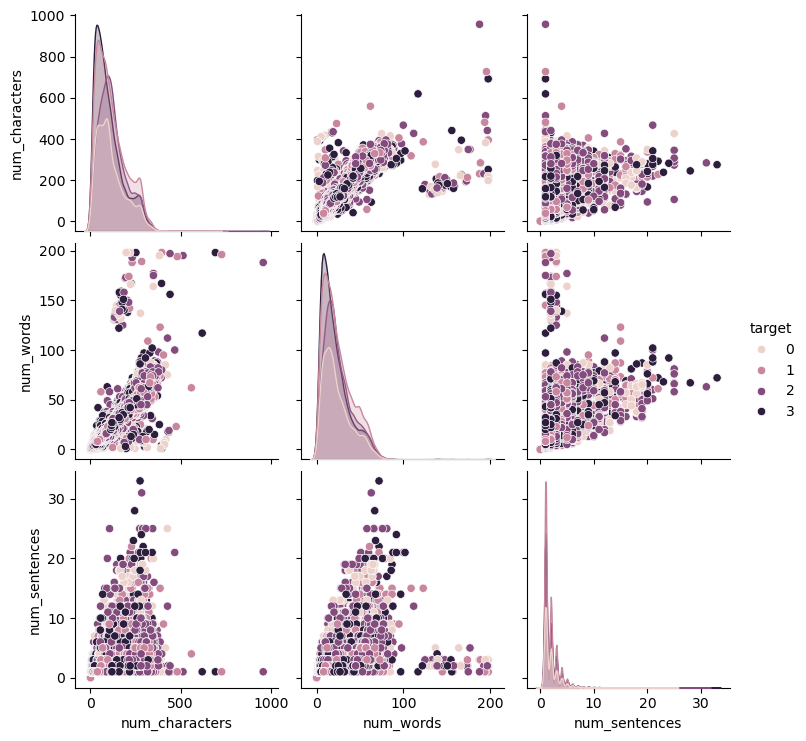

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

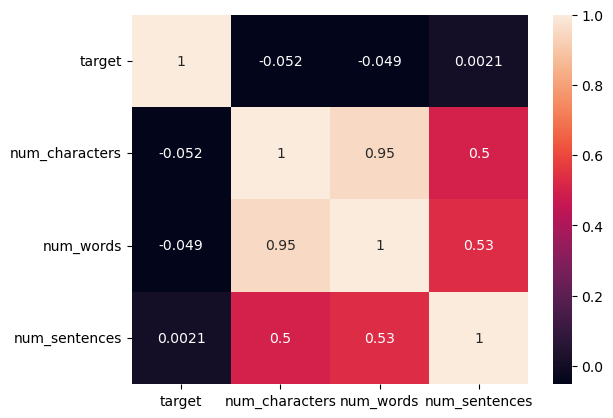

In [41]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True)

In [42]:
## 3. Data Preprocessing
# Lower case
# Tokenization
# Removing Special characters
# Removing stop words and punctuation
# Stemming

In [43]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y

In [47]:
df['text'][0]

'im getting on borderlands and i will murder you all ,'

In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [49]:
df['transformed_text'] = df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,3,im getting on borderlands and i will murder yo...,53,11,1,"[im, get, borderland, murder]"
1,3,I am coming to the borders and I will kill you...,51,13,1,"[come, border, kill]"
2,3,im getting on borderlands and i will kill you ...,50,11,1,"[im, get, borderland, kill]"
3,3,im coming on borderlands and i will murder you...,51,11,1,"[im, come, borderland, murder]"
4,3,im getting on borderlands 2 and i will murder ...,57,13,1,"[im, get, borderland, 2, murder]"


In [51]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [52]:
positive_wc = wc.generate(df[df['target'] == 3]['transformed_text'].astype(str).fillna('').str.cat(sep=" "))

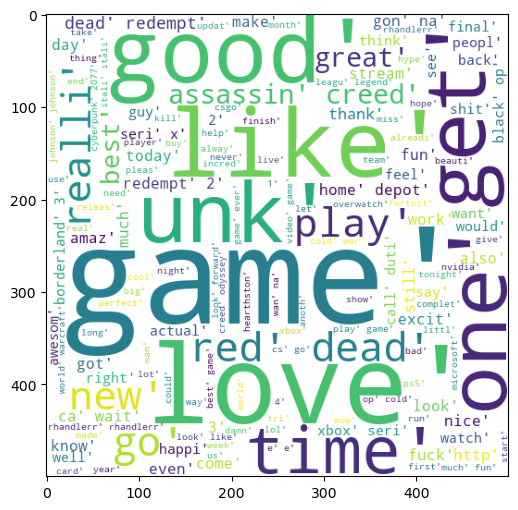

In [53]:
plt.figure(figsize=(12,6))
plt.imshow(positive_wc)

In [54]:
neutral_wc = wc.generate(df[df['target'] == 2]['transformed_text'].astype(str).fillna('').str.cat(sep=" "))

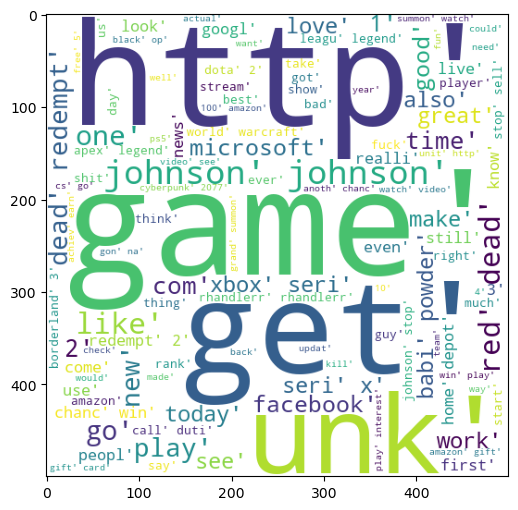

In [55]:
plt.figure(figsize=(12,6))
plt.imshow(neutral_wc)

In [56]:
negative_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).fillna('').str.cat(sep=" "))

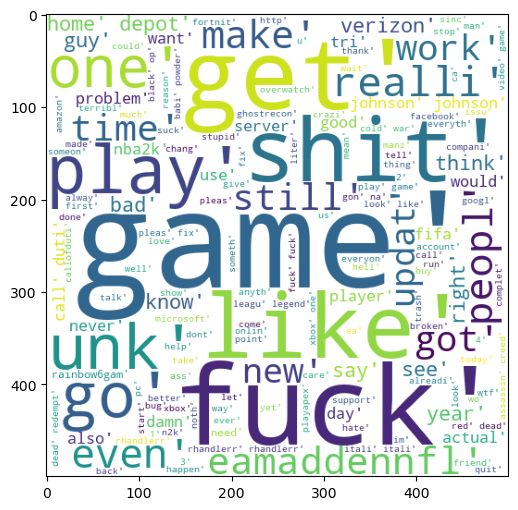

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(negative_wc)

In [58]:
irrelevant_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).fillna('').str.cat(sep=" "))

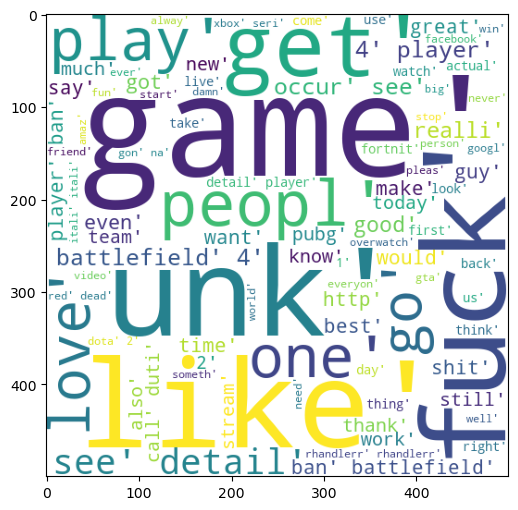

In [59]:
plt.figure(figsize=(12,6))
plt.imshow(irrelevant_wc)

In [60]:
negative_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    # If msg is a string, split it into words
    if isinstance(msg, str):
        for word in msg.split():
            negative_corpus.append(word)
    # If msg is already a list of words, extend spam_corpus with it
    elif isinstance(msg, list):
        negative_corpus.extend(msg)
    else:
        # Handle other data types if necessary
        pass

In [61]:
len(negative_corpus)

239564

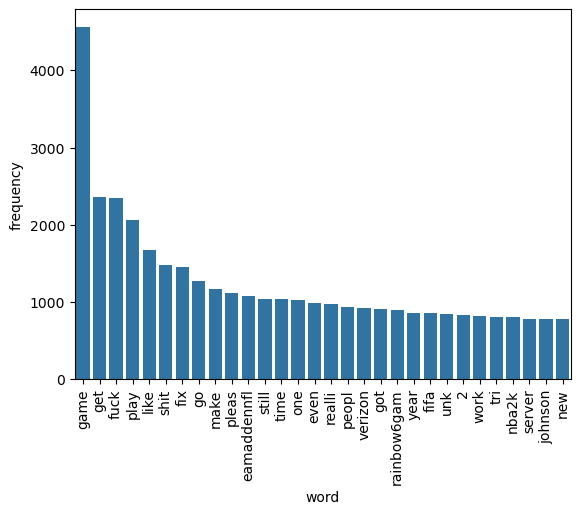

In [62]:
from collections import Counter
common_words = pd.DataFrame(Counter(negative_corpus).most_common(30), columns=['word', 'frequency'])
# Create a bar plot
sns.barplot(x='word', y='frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
positive_corpus = []
for msg in df[df['target'] == 3]['transformed_text'].tolist():
    # If msg is a string, split it into words
    if isinstance(msg, str):
        for word in msg.split():
            positive_corpus.append(word)
    # If msg is already a list of words, extend spam_corpus with it
    elif isinstance(msg, list):
        positive_corpus.extend(msg)
    else:
        # Handle other data types if necessary
        pass

In [64]:
len(positive_corpus)

190253

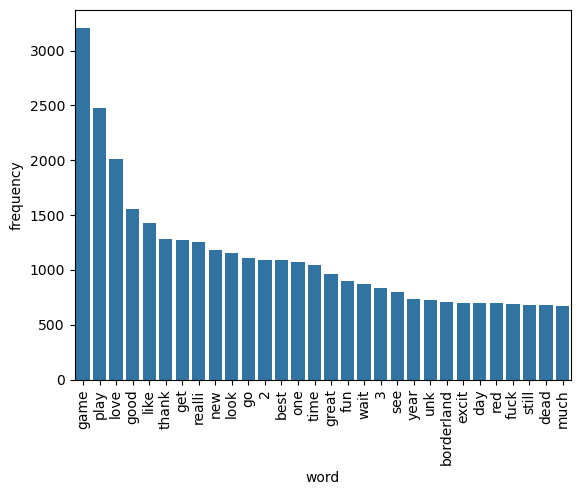

In [65]:
from collections import Counter
common_words = pd.DataFrame(Counter(positive_corpus).most_common(30), columns=['word', 'frequency'])
# Create a bar plot
sns.barplot(x='word', y='frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
irrelevant_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # If msg is a string, split it into words
    if isinstance(msg, str):
        for word in msg.split():
            irrelevant_corpus.append(word)
    # If msg is already a list of words, extend spam_corpus with it
    elif isinstance(msg, list):
        irrelevant_corpus.extend(msg)
    else:
        # Handle other data types if necessary
        pass

In [67]:
len(irrelevant_corpus)

133897

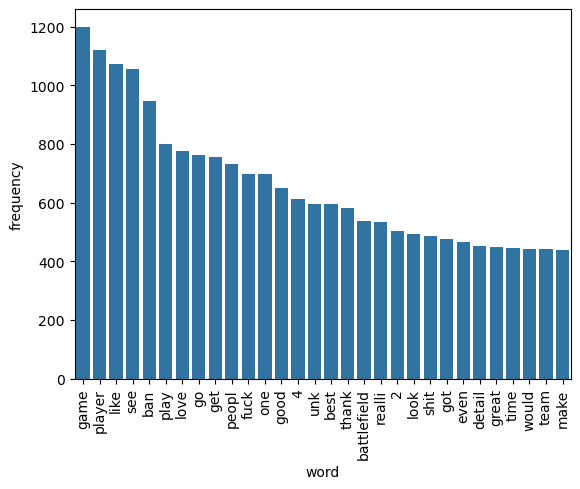

In [68]:
from collections import Counter
common_words = pd.DataFrame(Counter(irrelevant_corpus).most_common(30), columns=['word', 'frequency'])
# Create a bar plot
sns.barplot(x='word', y='frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
neutral_corpus = []
for msg in df[df['target'] == 2]['transformed_text'].tolist():
    # If msg is a string, split it into words
    if isinstance(msg, str):
        for word in msg.split():
            neutral_corpus.append(word)
    # If msg is already a list of words, extend spam_corpus with it
    elif isinstance(msg, list):
        neutral_corpus.extend(msg)
    else:
        # Handle other data types if necessary
        pass

In [70]:
len(neutral_corpus)

200168

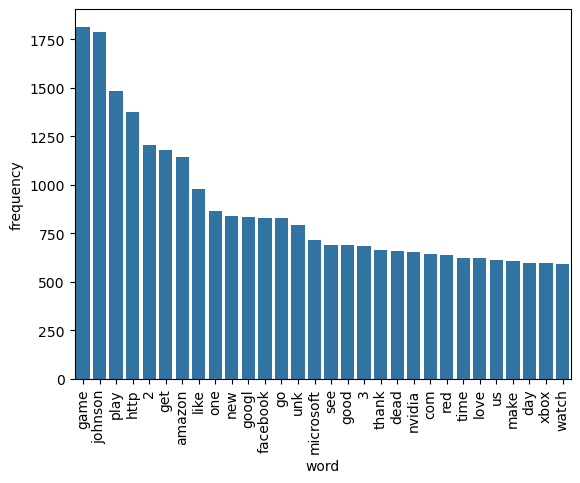

In [71]:
from collections import Counter
common_words = pd.DataFrame(Counter(neutral_corpus).most_common(30), columns=['word', 'frequency'])
# Create a bar plot
sns.barplot(x='word', y='frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
# 4. Model Building
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [74]:
# Join list of words back into a string for each row
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Then apply TfidfVectorizer
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [76]:
X.shape

(69769, 3000)

In [78]:
y = df['target'].values

In [82]:
y

array([3, 3, 3, ..., 3, 3, 3])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [91]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score for GNB:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix for GNB:\n",confusion_matrix(y_test,y_pred1))

Accuracy Score for GNB: 0.42188619750609146
Confusion Matrix for GNB:
 [[2255   54   42  103]
 [2035 1427  210  638]
 [1705  248  839  557]
 [2195  147  133 1366]]


In [93]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score for MNB:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix for MNB:\n",confusion_matrix(y_test,y_pred2))

Accuracy Score for MNB: 0.6149491185323205
Confusion Matrix for MNB:
 [[ 767  649  337  701]
 [ 124 3304  390  492]
 [ 172  699 1733  745]
 [ 122  600  342 2777]]


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score for BNB:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix for BNB:\n",confusion_matrix(y_test,y_pred3))

Accuracy Score for BNB: 0.6107926042711768
Confusion Matrix for BNB:
 [[1143  340  247  724]
 [ 310 2844  395  761]
 [ 361  465 1624  899]
 [ 231  384  314 2912]]


In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [101]:
rfc.fit(X_train,y_train)
y_pred4 = rfc.predict(X_test)
print("Accuracy Score for GNB:",accuracy_score(y_test,y_pred4))
print("Confusion Matrix for GNB:\n",confusion_matrix(y_test,y_pred4))

Accuracy Score for GNB: 0.8856241937795614
Confusion Matrix for GNB:
 [[2002  121  141  190]
 [  53 3917  170  170]
 [  47  146 2987  169]
 [  67  144  178 3452]]


In [103]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb')) #WriteBinary
pickle.dump(rfc,open('model.pkl','wb'))